In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import pickle
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
import numpy as np
from google.colab.patches import cv2_imshow
import os
import tqdm
import cv2
import matplotlib.pyplot as plt
from PIL import Image 
from tensorflow.keras import Sequential, Model
from tensorflow.python.client import device_lib
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img, img_to_array
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import TensorBoard
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json


figsize = (2.5, 2.5)

def plot_im(img, title):
    plt.figure(figsize=figsize)
    plt.imshow(img.astype('uint8'))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
#train_dic = r'.\data\train.p'
#test_dic  = r'.\data\test.p'
#val_dic   = r'.\valid.p'

model_dir = '/content/model_dir'
train = pickle.load(open('/content/drive/MyDrive/DATASET/train.p','rb'))
test  = pickle.load(open('/content/drive/MyDrive/DATASET/test.p','rb'))
val   = pickle.load(open('/content/drive/MyDrive/DATASET/valid.p', 'rb' ))



x_train , y_train  = train['features'] , train['labels']
x_test  , y_test   = test['features']  , test['labels']
x_val   , y_val    = val['features']   , val['labels']


y_train = tf.one_hot(y_train,43)
y_test  = tf.one_hot(y_test,43)
y_val   = tf.one_hot(y_val,43) 
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [ ]:
def create_model() :
    model=Sequential()

    model.add(Conv2D(filters = 256,  kernel_size = (5,5), padding='same', activation='relu', input_shape = (32, 32, 3)))
    model.add(MaxPool2D(pool_size=(2, 2), padding = 'same'))

    model.add(Conv2D(filters = 512, kernel_size = (5,5), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), padding = 'same'))

    model.add(Conv2D(filters = 1024, kernel_size = (5,5), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), padding = 'same'))


    model.add(Flatten())

    model.add(Dense(units= 1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units= 512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units= 256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units= 100, activation='relu'))

    model.add(Dense(units= 43, activation='softmax'))

    model.compile(optimizer= Adam(), loss= CategoricalCrossentropy() ,metrics='accuracy')

    return model


model = create_model()

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=512,epochs=50,validation_data=(x_val,y_val))


Epoch 1/50
68/68 [==============================] - 45s 462ms/step - loss: 6.3765 - accuracy: 0.0572 - val_loss: 3.4268 - val_accuracy: 0.1043
Epoch 2/50
68/68 [==============================] - 21s 304ms/step - loss: 3.0496 - accuracy: 0.1665 - val_loss: 2.3399 - val_accuracy: 0.3417
Epoch 3/50
68/68 [==============================] - 21s 310ms/step - loss: 1.9122 - accuracy: 0.4281 - val_loss: 1.4425 - val_accuracy: 0.5787
Epoch 4/50
68/68 [==============================] - 21s 313ms/step - loss: 1.1013 - accuracy: 0.6615 - val_loss: 0.7538 - val_accuracy: 0.8086
Epoch 5/50
68/68 [==============================] - 21s 315ms/step - loss: 0.5991 - accuracy: 0.8174 - val_loss: 0.4594 - val_accuracy: 0.8726
Epoch 6/50
68/68 [==============================] - 22s 318ms/step - loss: 0.3342 - accuracy: 0.8988 - val_loss: 0.3637 - val_accuracy: 0.9073
Epoch 7/50
68/68 [==============================] - 22s 319ms/step - loss: 0.2187 - accuracy: 0.9358 - val_loss: 0.3147 - val_accuracy: 0.9265

In [ ]:
model.evaluate(x= x_test , y= y_test, batch_size= 512 , verbose=1)

25/25 [==============================] - 3s 105ms/step - loss: 0.6334 - accuracy: 0.9411


[0.6333549618721008, 0.9410926103591919]

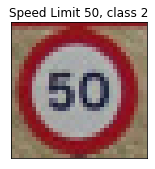

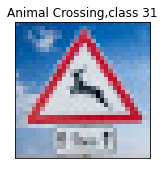

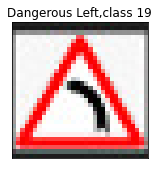

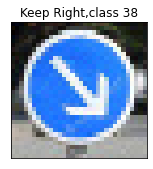

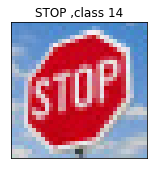

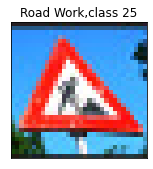

In [ ]:
x1 = cv2.imread('/content/speedLimit50_2.png')
x2 = cv2.imread('/content/wildAnimals31.png')
x3 = cv2.imread('/content/dangerousLeft19.png')
x4 = cv2.imread('/content/keepRight38.png')
x5 = cv2.imread('/content/stop14.png')
x6 = cv2.imread('/content/roadWork25.png')
x1 = cv2.cvtColor(x1, cv2.COLOR_BGR2RGB)
x2 = cv2.cvtColor(x2, cv2.COLOR_BGR2RGB)
x3 = cv2.cvtColor(x3, cv2.COLOR_BGR2RGB)
x4 = cv2.cvtColor(x4, cv2.COLOR_BGR2RGB)
x5 = cv2.cvtColor(x5, cv2.COLOR_BGR2RGB)
x6 = cv2.cvtColor(x6, cv2.COLOR_BGR2RGB)
plot_im(x1, "Speed Limit 50, class 2")
plot_im(x2, "Animal Crossing,class 31")
plot_im(x3, "Dangerous Left,class 19")
plot_im(x4, "Keep Right,class 38")
plot_im(x5, "STOP ,class 14")
plot_im(x6, "Road Work,class 25")

In [ ]:
x1 = ('/content/speedLimit50_2.png') 
x2 = ('/content/wildAnimals31.png') 
x3 = ('/content/dangerousLeft19.png') #detected as class 29
x4 = ('/content/keepRight38.png')
x5 = ('/content/stop14.png')
x6 = ('/content/roadWork25.png')
x = load_img(x2)
x = img_to_array(x)
x = np.expand_dims(x, axis=0)
y = model.predict(x)
y.argmax()

31

In [ ]:
x = load_img(x4)
x = img_to_array(x)
x = np.expand_dims(x, axis=0)
y = model.predict(x)
y.argmax()

38

In [ ]:
x = load_img(x5)
x = img_to_array(x)
x = np.expand_dims(x, axis=0)
y = model.predict(x)
y.argmax()

14

In [ ]:
x = load_img(x6)
x = img_to_array(x)
x = np.expand_dims(x, axis=0)
y = model.predict(x)
y.argmax()

25

In [ ]:
x = load_img(x1)
x = img_to_array(x)
x = np.expand_dims(x, axis=0)
y = model.predict(x)
y.argmax()

2

In [ ]:
x = load_img(x3)
x = img_to_array(x)
x = np.expand_dims(x, axis=0)
y = model.predict(x)
y.argmax()

24

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 512)       3277312   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 512)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 1024)        13108224  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 1024)       0

In [ ]:
model.save(model_dir)

INFO:tensorflow:Assets written to: /content/model_dir/assets


INFO:tensorflow:Assets written to: /content/model_dir/assets


In [ ]:
model = load_model(model_dir)